In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t = np.linspace( 300, 3600, num = 34 )
r = [5.65, 8.06, 10.56,13.23,16.09,19.00,21.94,24.93,27.94,30.98,34.08,37.19,40.36,43.55,46.78,50.05,53.35,56.67,
     60.06,63.48,66.91,70.39,73.91,77.49,81.04,84.70,88.33,
     92.04,95.76,99.54,103.3,107.2,111.1,115.0]

I1 = [0.561,0.811,0.967,1.14,1.672,1.834,2.93,3.35,3.37,3.93,
    4.15,4.44,4.65,5.22,5.31,5.54,5.97,6.62,7.37,8.54,9.45]
V1 = [0.031,0.044,0.054,0.064,0.095,0.105,0.171,0.2,0.205,0.237,0.253
     ,0.277,0.295,0.334,0.343,0.361,0.396,0.457,0.531,0.664,0.787]

I2 = [3.34,4.58,5.36,6.42,7.16,8.21,10.06,10.9,11.33,11.84,12.42,13.68,
      15.38,15.54,16.87,17.85,18.58,19.19,19.92,21.8,23.9]
V2 = [0.2,0.286,0.346,0.434,0.513,0.647,0.882,1.02,1.081,1.167,1.282,
      1.524,1.85,1.9,2.2,2.41,2.56,2.81,3.01,3.52,4.15]

I3 = [13.4,23.4,25.6,30.5,33,35.4,39.9,43.3,48.8,52.3,55.7,59.3,63.9,
      68.5,76.1,75.7,81.3,85.9,87.7,92.9,99.9]
V3 = [1.51,3.94,4.62,6.25,7.22,8.02,9.85,11.25,13.42,15.34,16.79,18.54,
      20.07,23.3,26.9,27.1,30.4,32.4,34,37.2,41.9]

I4 = [21.3,25.9,32.1,35.9,38.5,44.6,47.1,54.3,56.3,60.4,63,67.9,
      71.1,75.2,78.2,82.2,86.1,88.3,93.5,98.4,100.1]
V4 = [3.3,4.78,6.79,8.15,9.09,11.58,12.76,16,16.95,19.05,20.2,22.6,24.1,27.2,28.2,
      30.7,33.1,34.4,37.4,40.4,42.3]



#  Formula para hallar $\beta $ que minimiza el error cuadratico medio (MCO)
$ \beta = (X^{T}X)^{-1} X^{T} Y$

In [3]:
#El metodo recibe 2 arrays y nos da los parametros para la regresion lineal que minimiza el error cuadratico
def MinCua(a,b):
    
    #Se convierten en arrays de numpy para poder usar los metodos de dicha libreria
    xt = np.array(a)
    Y = np.array(b)

    #se añade columna de unos(1) para representar el termino independiente
    C1 =  np.ones(len(xt))
    
    """" 
    Se transpone X debido a que la matriz de parametros beta resultante, tiene la forma de 1 fila y 2 coumnas
    por tanto no esta en la forma vectorial sino en la vectorial transpuesta 
    """
    
    X = np.array([C1, xt]).T

    # @ = Multiplicacion Matricial
    # X.T = np.transpose(x) = X transpuesta
    B = np.linalg.inv(X.T @ X) @ X.T @ Y

    #Esta operacion nos da como resultado una lista con 2 parametros, el primero representa la variable independiente
    # y el segundo la pendiente optima para minimizar el error cuadratico, esta formula se demostro en algebra lineal
    #b = B[0]
    #m = B[1]
    return [B[0],B[1],xt, X, Y]

In [4]:
def graf(c,d, n1, n2):
    B = MinCua(c,d)
    b = B[0]
    m = B[1]
    i1 = B[2]
    T = B[3]
    v1 = B[4]
    axs[n1,n2].scatter(i1,v1, alpha = 0.7)
    axs[n1,n2].plot([min(i1), max(i1)] , [m*min(i1) + b, m*max(i1) + b], c = "orange" )
    axs[n1,n2].set_xlabel("corriente(miliAmperios)")
    axs[n1,n2].set_ylabel("Voltaje (V)")
    axs[n1,n2].set_title('Corriente VS Voltaje')
    



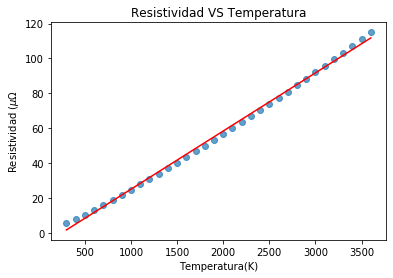

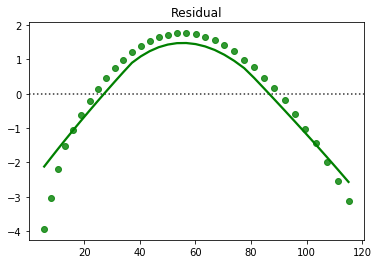

In [5]:
B = MinCua(t,r)
b = B[0]
m = B[1]
t = B[2]
T = B[3]
r = B[4]
plt.scatter(t,r, alpha = 0.7)
plt.plot([min(t), max(t)] , [m*min(t) + b, m*max(t) + b], c = "red" )
plt.xlabel("Temperatura(K)")
plt.ylabel("Resistividad ($\mu \Omega$")
plt.title('Resistividad VS Temperatura')
plt.savefig('R_VS_T.png')
plt.show()

teo = r
ex = b + m*t
sns.residplot(teo, ex, lowess=True, color="g" )
plt.title('Residual')
plt.savefig('residualRT.png')
plt.show()

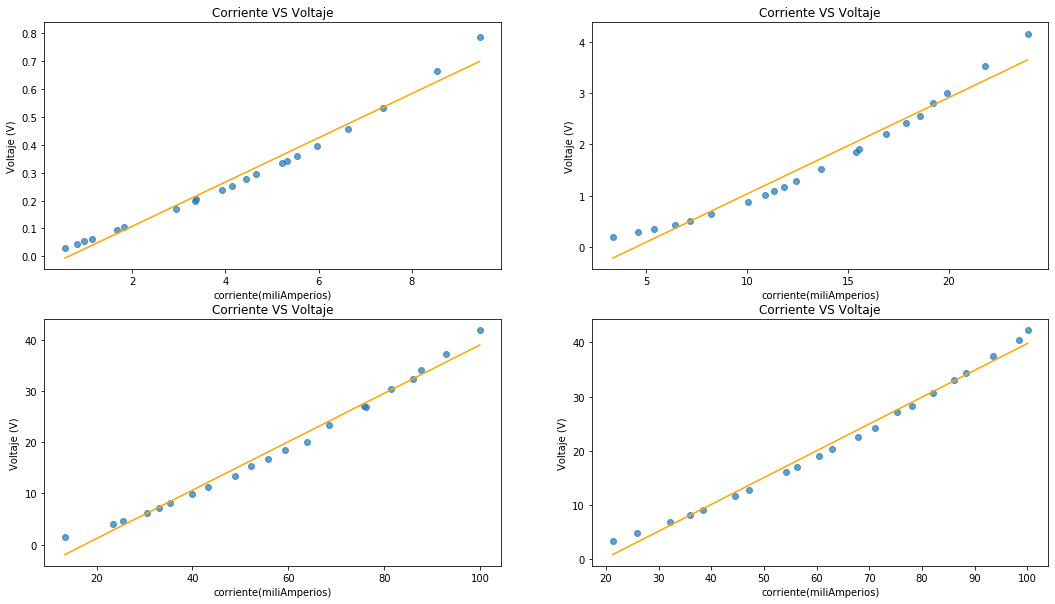

In [6]:
fig, axs = plt.subplots(2,2, figsize =  (18,10))
graf(I1,V1, 0, 0)
graf(I2,V2, 0, 1)
graf(I3,V3,1,0)
graf(I4,V4,1,1)